<a href="https://colab.research.google.com/github/Victor-LE-GALL/Projet-Data-Analyst/blob/main/Data_Analyst_Analyse_Tennis_Tous_tournois_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# on récupère les données (fichier csv)
path_drive_tennis='/content/drive/MyDrive/Tennis/'
df=pd.read_csv(path_drive_tennis+'tetes_de_serie_tout_v2.csv')

In [15]:
def calcul_par_annee(type_tournoi, reverse, cote_min, cote_max, tetes_de_serie, tour):   # fonction qui calcule le gain obtenu en pariant sur certains matchs uniquement (d'après les paramètres entrés)
  x=[]
  annees=[2012, 2013, 2014, 2015, 2016, 2017 ,2018, 2019, 2020, 2021, 2022]
  nb_paris=[]
  cote_moyenne=[]

  for k in annees:
    solde=0
    nb=0
    cote_moy=0
    for tete_serie in tetes_de_serie:
      for i in range(0, len(df)):
        if df.at[i, 'Tournoi_type']==type_tournoi and df.at[i, 'Tour']==tour and  int(df.at[i, 'Année'])==k:
          if reverse==0:
            # on parie sur la tete de serie
            if df.at[i, 'Cote_1']>cote_min and df.at[i, 'Cote_1']<cote_max and df.at[i, 'Joueur_1']==tete_serie and df.at[i, 'Joueur_2']!=tete_serie:
              nb=nb+1
              cote_moy=cote_moy+df.at[i, 'Cote_1']
              if df.at[i, 'Res_1']>df.at[i, 'Res_2']:
                #gagné
                solde=solde-1+df.at[i, 'Cote_1']
              else:
                #perdu
                solde=solde-1

            if df.at[i, 'Cote_2']>cote_min and df.at[i, 'Cote_2']<cote_max and df.at[i, 'Joueur_2']==tete_serie and df.at[i, 'Joueur_1']!=tete_serie:
              nb=nb+1
              cote_moy=cote_moy+df.at[i, 'Cote_2']
              if df.at[i, 'Res_2']>df.at[i, 'Res_1']:
                #gagné
                solde=solde-1+df.at[i, 'Cote_2']
              else:
                #perdu
                solde=solde-1
          else:
            # on parie sur l'autre joueur
            if df.at[i, 'Cote_1']>cote_min and df.at[i, 'Cote_1']<cote_max and df.at[i, 'Joueur_1']==tete_serie and df.at[i, 'Joueur_2']!=tete_serie:
              nb=nb+1
              cote_moy=cote_moy+df.at[i, 'Cote_2']
              if df.at[i, 'Res_2']>df.at[i, 'Res_1']:
                #gagné
                solde=solde-1+df.at[i, 'Cote_2']
              else:
                #perdu
                solde=solde-1

            if df.at[i, 'Cote_2']>cote_min and df.at[i, 'Cote_2']<cote_max and df.at[i, 'Joueur_2']==tete_serie and df.at[i, 'Joueur_1']!=tete_serie:
              nb=nb+1
              cote_moy=cote_moy+df.at[i, 'Cote_1']
              if df.at[i, 'Res_1']>df.at[i, 'Res_2']:
                #gagné
                solde=solde-1+df.at[i, 'Cote_1']
              else:
                #perdu
                solde=solde-1

    if nb>0:
      cote_moy=cote_moy/nb
    else:
      cote_moy=0
    x.append(round(solde, 2))
    nb_paris.append(nb)
    cote_moyenne.append(cote_moy)

  # on retourne le gain, le nombre de paris et la cote moyenne. Ces trois variables sont des listes avec une valeur par année de 2012 à 2022.
  return x, nb_paris, cote_moyenne

In [16]:
def rentable():

  cotes_min=[1.2, 1.5, 2, 2.5, 3, 3.5]
  tours=[64, 32, 16, 8, 4, 2, 1]
  for i1 in range(0, 2):  # on détermine si l'on mise sur le joueur tête de série (reverse=0) ou sur l'adversaire (reverse=1)
    reverse=i1
    for i2 in range(0, 3): # itération sur le type de tournoi
      type_tournoi=i2
      print(type_tournoi)
      for i3 in cotes_min :  # itération sur les cotes (par tranches de 0.5)
        cote_min=i3
        cote_max=cote_min+0.5
        for i4 in tours:  # itération sur le tour
          tour=i4
          for i5 in range(0, 40): # itération sur les têtes de série
            tetes_de_serie=[i5]

            x=calcul_par_annee(type_tournoi, reverse, cote_min, cote_max, tetes_de_serie, tour) # calcul du gain grâce à la fonction calcul_par_annee

            # on garde les paramètres qui montrent un gain au moins sur 5 années et une perte au maximum 1 fois (certaines années n'ont aucun paris, donc un résultat nul)
            pos=0
            neg=0
            for i in range(0, len(x)):
              if x[i]>0:
                pos=pos+1
              if x[i]<0:
                neg=neg+1
            if pos>4 and neg <2:
              print(type_tournoi, reverse, cote_min, cote_max, tetes_de_serie, tour)
              print(x)
              

In [17]:
#à l'aide de la fonction "rentable", les paramètres suivants ont été identifiés comme rapportant un gain
# l'objectif est maintenant d'en vérifier la stabilité, un par un (visuellement grâce à des graphiques)

#x1, x2... gain stable
#x1_1, x1_2... gain plutôt stable
#x2_1, x2_2... gain moyennement stable
#-----x... gain trop peu stable pour être considéré

x1, nb1, c1=calcul_par_annee(0, 0, 1.2, 1.7, [38], 16)
x2_1, nb2_1, c2_1=calcul_par_annee(0, 0, 1.2, 1.7, [6], 1)
x2_2, nb2_2, c2_2=calcul_par_annee(0, 0, 2, 2.5, [37], 16)
x2_3, nb2_3, c2_3=calcul_par_annee(0, 0, 2, 2.5, [3], 1)
#----x=calcul_par_annee(0, 0, 2, 2.5, [3], 2)
x1_1, nb1_1, c1_1=calcul_par_annee(0, 0, 3, 3.5, [8], 4)

x2,nb2, c2=calcul_par_annee(1, 0, 1.2, 1.7, [8], 32)
x2_4,nb2_4, c2_4=calcul_par_annee(1, 0, 1.2, 1.7, [16], 32)
#----x=calcul_par_annee(1, 0, 1.2, 1.7, [17], 32)
#----x=calcul_par_annee(1, 0, 1.2, 1.7, [19], 32)
x2_5, nb2_5, c2_5=calcul_par_annee(1, 0, 1.2, 1.7, [3], 2)
x2_6, nb2_6, c2_6=calcul_par_annee(1, 0, 1.5, 2, [34], 64)
x2_7, nb2_7, c2_7=calcul_par_annee(1, 0, 2, 2.5, [0], 4)
x2_8, nb2_8, c2_8=calcul_par_annee(1, 0, 3.5, 4, [0], 4)

x2_9, nb2_9, c2_9=calcul_par_annee(2, 0, 1.2, 1.7, [17], 64)
x2_10, nb2_10, c2_10=calcul_par_annee(2, 0, 1.2, 1.7, [22], 64)
x3, nb3, c3=calcul_par_annee(2, 0, 1.2, 1.7, [6], 32)
#---x=calcul_par_annee(2, 0, 1.2, 1.7, [9], 32)
x4, nb4, c4=calcul_par_annee(2, 0, 1.2, 1.7, [10], 32)
x2_11, nb2_11, c2_11=calcul_par_annee(2, 0, 1.2, 1.7, [28], 32)
#---x=calcul_par_annee(2, 0, 1.2, 1.7, [16], 16)
#---x=calcul_par_annee(2, 0, 1.2, 1.7, [20], 16)
x5, nb5, c5=calcul_par_annee(2, 0, 1.2, 1.7, [7], 8)
x2_12, nb2_12, c2_12=calcul_par_annee(2, 0, 1.2, 1.7, [8], 8)
#----x=calcul_par_annee(2, 0, 1.2, 1.7, [1], 4)
x1_2, nb1_2, c1_2=calcul_par_annee(2, 0, 1.2, 1.7, [7], 4)
x1_3, nb1_3, c1_3=calcul_par_annee(2, 0, 1.2, 1.7, [1], 2)
x6, nb6, c6=calcul_par_annee(2, 0, 1.2, 1.7, [4], 2)


x1_4, nb1_4, c1_4=calcul_par_annee(0, 1, 1.2, 1.7, [15], 16)
x1_5, nb1_5, c1_5=calcul_par_annee(0, 1, 1.2, 1.7, [13], 4)
x7, nb7, c7=calcul_par_annee(0, 1, 2.5, 3, [7], 8)
x1_6, nb1_6, c1_6=calcul_par_annee(0, 1, 2.5, 3, [6], 4)
x8, nb8, c8=calcul_par_annee(0, 1, 3, 3.5, [0], 32)
x9, nb9, c9=calcul_par_annee(0, 1, 3, 3.5, [35], 32)
x2_13, nb2_13, c2_13=calcul_par_annee(0, 1, 3, 3.5, [7], 16)
x2_14, nb2_14, c2_14=calcul_par_annee(0, 1, 3, 3.5, [36], 16)
#----x=calcul_par_annee(0, 1, 3, 3.5, [5], 4)
x1_7, nb1_7, c1_7=calcul_par_annee(0, 1, 3, 3.5, [6], 4)
x10, nb10, c10=calcul_par_annee(0, 1, 3, 3.5, [0], 32)
#----x=calcul_par_annee(0, 1, 3, 3.5, [7], 4)

x11 ,nb11, c11=calcul_par_annee(1, 1, 1.2, 1.7, [21], 32)
x1_8, nb1_8, c1_8=calcul_par_annee(1, 1, 1.2, 1.7, [11], 8)
x12, nb12, c12=calcul_par_annee(1, 1, 1.5, 2, [8], 16)
x13, nb13, c13=calcul_par_annee(1, 1, 2, 2.5, [13], 16)
x2_15, nb2_15, c2_15=calcul_par_annee(1, 1, 2, 2.5, [7], 8)
#----x=calcul_par_annee(1, 1, 3.5, 4, [0], 8)

x1_9, nb1_9, c1_9=calcul_par_annee(2, 1, 1.2, 1.7, [13], 32)
x2_16, nb2_16, c2_16=calcul_par_annee(2, 1, 1.2, 1.7, [11], 16)
x1_10, nb1_10, c1_10=calcul_par_annee(2, 1, 1.5, 2, [30], 32)
x2_17, nb2_17, c2_17=calcul_par_annee(2, 1, 3, 3.5, [0], 8)
x1_11, nb1_11, c1_11=calcul_par_annee(2, 1, 3.5, 4, [35], 64)
x14, nb14, c14=calcul_par_annee(2, 1, 3.5, 4, [0], 8)



In [20]:
# données du diagramme circulaire
x_gc=[0, 0, 0, 0,0, 0, 0, 0,0, 0,0]
x_m1=[0, 0, 0, 0,0, 0, 0, 0,0, 0,0]
x_atp=[0, 0, 0, 0,0, 0, 0, 0,0, 0,0]

for i in range(0, len(x_gc)):
  x_atp[i]=x1[i]+x1_1[i]+x2_1[i]+x2_2[i]+x2_3[i]+x7[i]+x8[i]+x9[i]+x10[i]+ x1_5[i]+x1_6[i]+x1_7[i]+x2_13[i] + x2_14[i]   
  x_m1[i]=x2[i]+x2_4[i]+x2_5[i]+x2_6[i]+x2_7[i]+x2_8[i] +x11[i]+x12[i]+x13[i]+ x1_8[i]+x2_15[i]   
  x_gc[i]=x3[i]+x4[i]+x5[i]+x6[i] +x1_2[i]+x1_3[i]+ x2_9[i]+x2_10[i]+x2_11[i]+ x2_12[i] +x1_9[i]+x2_16[i]+x1_10[i] + x2_17[i]+x1_11[i]+x14[i]     

s1=(sum(x_atp))
s2=(sum(x_m1))
s3=(sum(x_gc))
prct1=s1/(s1+s2+s3)
prct2=s2/(s1+s2+s3)
prct3=s3/(s1+s2+s3)
sizes_pie = [prct1, prct2, prct3]
labels_pie = 'ATP 500 et moins', 'Masters 1000', 'Grand Chelem'

In [21]:
#données du graphique en barres multiples
nb_gc=[0, 0, 0, 0,0, 0, 0, 0,0, 0,0]
nb_m1=[0, 0, 0, 0,0, 0, 0, 0,0, 0,0]
nb_atp=[0, 0, 0, 0,0, 0, 0, 0,0, 0,0]
for i in range(0, len(nb_gc)):
  nb_atp[i]=nb1[i]+nb7[i]+nb8[i]+nb9[i]+nb10[i]+ nb1_1[i]+nb1_5[i]+nb1_6[i]+nb1_7[i]+nb2_1[i]+nb2_2[i]+nb2_3[i]+nb2_13[i]+nb2_14[i]
  nb_m1[i]=nb2[i]+nb11[i]+nb12[i]+nb13[i]+nb1_8[i]+nb2_4[i]+nb2_5[i]+nb2_6[i]+nb2_7[i]+nb2_8[i]+nb2_15[i]
  nb_gc[i]=nb3[i]+nb4[i]+nb5[i]+nb6[i]+nb14[i] + nb1_2[i]+nb1_3[i]+nb1_9[i]+nb1_10[i]+nb1_11[i]+nb2_9[i]+nb2_10[i]+nb2_11[i]+nb2_12[i]+nb2_16[i]+nb2_17[i]
series_multiple_bar = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [22]:
#données du graphique en barres horinzontales
c_gc=[0, 0, 0, 0,0, 0, 0, 0,0, 0,0]
c_m1=[0, 0, 0, 0,0, 0, 0, 0,0, 0,0]
c_atp=[0, 0, 0, 0,0, 0, 0, 0,0, 0,0]

liste_c_gc=[c1,c7,c8,c9,c10, c1_1, c1_5,c1_6,c1_7, c2_1,c2_2,c2_3,c2_13,c2_14]
liste_c_m1=[c2,c11,c12,c13, c1_8, c2_4,c2_5,c2_6,c2_7,c2_8, c2_15]
liste_c_atp=[c3,c4,c5,c6, c14, c1_2,c1_3, c1_9,c1_10,c1_11, c2_9,c2_10,c2_11,c2_12, c2_16,c2_17]

for i in range(0, len(c_gc)):
  nb_cote_gc=0
  nb_cote_m1=0
  nb_cote_atp=0
  for j in liste_c_gc:
    if j[i]>0.5:
      nb_cote_gc=nb_cote_gc+1
  for k in liste_c_m1:
    if k[i]>0.5:
      nb_cote_m1=nb_cote_m1+1
  for l in liste_c_atp:
    if l[i]>0.5:
      nb_cote_atp=nb_cote_atp+1


  calcul_atp=c1[i]+c1_1[i]+c2_1[i]+c2_2[i]+c2_3[i]+c7[i]+c8[i]+c9[i]+c10[i]+ c1_5[i]+c1_6[i]+c1_7[i]+c2_13[i] + c2_14[i]   
  calcul_m1=c2[i]+c2_4[i]+c2_5[i]+c2_6[i]+c2_7[i]+c2_8[i] +c11[i]+c12[i]+c13[i]+ c1_8[i]+c2_15[i]   
  calcul_gc=c3[i]+c4[i]+c5[i]+c6[i] +c1_2[i]+c1_3[i]+ c2_9[i]+c2_10[i]+c2_11[i]+ c2_12[i] +c1_9[i]+c2_16[i]+c1_10[i] + c2_17[i]+c1_11[i]+c14[i] 

  if nb_cote_gc>0:
    c_gc[i]=calcul_gc/nb_cote_gc
  else:
    c_gc[i]=0

  if nb_cote_m1>0:
    c_m1[i]=calcul_m1/nb_cote_m1
  else:
    c_m1[i]=0

  if nb_cote_atp>0:
    c_atp[i]=calcul_atp/nb_cote_atp
  else:
    c_atp[i]=0
  
total=0
nombre=0
for i in range(0, len(c_atp)):
  total=total+c_atp[i]
  if c_atp[i]>0:
    nombre=nombre+1
s1=total/nombre
total=0
nombre=0
for i in range(0, len(c_m1)):
  total=total+c_m1[i]
  if c_m1[i]>0:
    nombre=nombre+1
s2=total/nombre
total=0
nombre=0
for i in range(0, len(c_gc)):
  total=total+c_gc[i]
  if c_gc[i]>0:
    nombre=nombre+1
s3=total/nombre

c_tot=[]
c_tot.append(s1)
c_tot.append(s2)
c_tot.append(s3)
series_bar_h = ['ATP 500 ou moins', 'Masters 1000', 'Grand Chelem']

In [23]:
#données de la courbe et du graphique en barres
x_bar=[0, 0, 0, 0,0, 0, 0, 0,0, 0,0]
x_tot=[0, 0, 0, 0,0, 0, 0, 0,0, 0,0]
total=0
for i in range(0, len(x_bar)):
  x_bar[i]=x1[i]+x2[i]+x3[i]+x4[i]+x5[i]+x6[i]+x7[i]+x8[i]+x9[i]+x10[i]+x11[i]+x12[i]+x13[i]+x14[i] + x1_1[i]+x1_2[i]+x1_3[i]+x1_4[i]+x1_5[i]+x1_6[i]+x1_7[i]+x1_8[i]+x1_9[i]+x1_10[i]+x1_11[i]+x2_1[i]+x2_2[i]+x2_3[i]+x2_4[i]+x2_5[i]+x2_6[i]+x2_7[i]+x2_8[i]+x2_9[i]+x2_10[i]+x2_11[i]+x2_12[i]+x2_13[i]+x2_14[i]+x2_15[i]+x2_16[i]+x2_17[i]

for i in range(0, len(x_bar)):
  total=total+x_bar[i]
  x_tot[i]=total
series_bar = ['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']

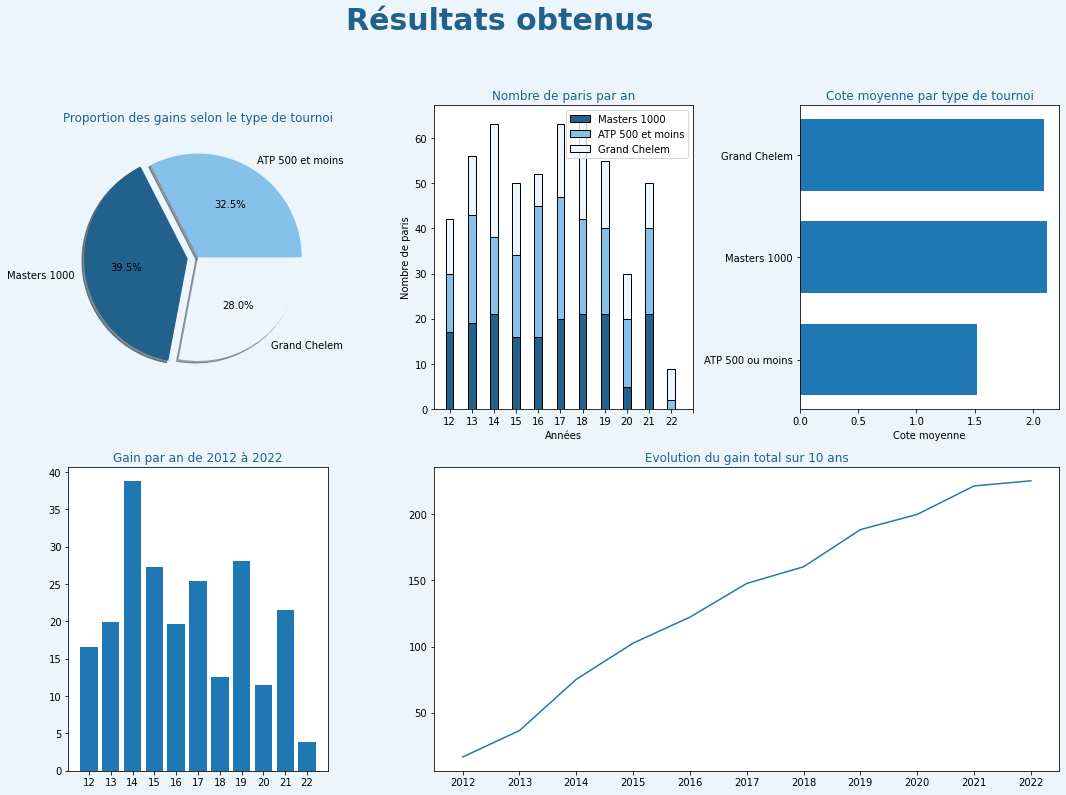

In [24]:
# Création de la figure et des sous-figures
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Résultats obtenus', size = 30, fontweight = 'bold', color='#21618c', x=0.35, y=1.1)
ax1 = plt.subplot2grid((2,4), (0,0)) 
ax2 = plt.subplot2grid((2,4), (0,1)) 
ax3 = plt.subplot2grid((2,4), (0,2)) 
ax4 = plt.subplot2grid((2,4), (1,0)) 
ax5 = plt.subplot2grid((2,4), (1,1), colspan=2) 
n = np.array([0,1,2,3,4,5])
x = np.linspace(0,5,10)
xx = np.linspace(-0.75, 1., 100)

# 1 - Diagramme circulaire
colors = ['#85c1e9', '#21618c', '#ebf5fb']
explode = (0, 0.1, 0)  
ax1.pie(sizes_pie, explode=explode, labels=labels_pie,  autopct='%1.1f%%', colors=colors, shadow=True)
ax1.set_title('Proportion des gains selon le type de tournoi', color='#21618c')


# 2 - Graphique en barres superposées
x1=nb_m1
x2=nb_atp
x3=nb_gc
N = 11
x1_x2=[0, 0, 0, 0,0, 0, 0, 0,0, 0,0]
for i in range(0, len(x1)):
  x1_x2[i]=x1[i]+x2[i]
ind = np.arange(N) 
width = 0.35
ax2.bar(ind, x1, width, color='#21618c', edgecolor='k')
ax2.bar(ind, x2, width,bottom=x1, color='#85c1e9', edgecolor='k')
ax2.bar(ind, x3, width,bottom=x1_x2, color='#ebf5fb', edgecolor='k')
ax2.set_ylabel('Nombre de paris')
ax2.set_xlabel('Années')
ax2.set_xticks([0, 1,2,3,4,5, 6, 7, 8, 9, 10, 11])
ax2.set_xticklabels(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22'])
ax2.legend(labels=['Masters 1000', 'ATP 500 et moins', 'Grand Chelem'])
ax2.set_title("Nombre de paris par an", color='#21618c')

# 3 - Graphique en barres horizontales
ax3.barh(series_bar_h, c_tot, height=0.7)
ax3.set_xlabel('Cote moyenne')
ax3.set_title("Cote moyenne par type de tournoi", color='#21618c')

# 4 - Graphique en barres
ax4.bar(series_bar, x_bar)
ax4.set_title("Gain par an de 2012 à 2022", color='#21618c')

# 5 - Courbe
x= ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
ax5.plot(x, x_tot) 
ax5.set_title("Evolution du gain total sur 10 ans", color='#21618c')

# Couleur de fond
fig.set_facecolor('#ebf5fb')
fig.tight_layout()